# 作業

實作模糊與邊緣檢測

- 透過 Gaussian Filter 實作模糊操作
- 透過 Sobel Filter 實作邊緣檢測

In [63]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/lena.png')

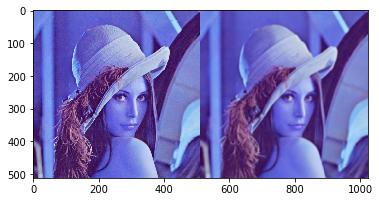

In [5]:
img_blur = img.copy()

# 重複多次 Gaussian 模糊的操作來加深模糊的程度
img_blur = cv2.GaussianBlur(img_blur, (5, 5), 0)
img_blur = cv2.GaussianBlur(img_blur, (5, 5), 0)
img_blur = cv2.GaussianBlur(img_blur, (5, 5), 0)

#　組合 + 顯示圖片
img_show = np.hstack((img, img_blur))
plt.imshow(img_show)

In [31]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [32]:
img_grey

array([[162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       [162, 162, 162, ..., 170, 155, 128],
       ...,
       [ 43,  43,  50, ..., 104, 100,  98],
       [ 44,  44,  55, ..., 104, 105, 108],
       [ 44,  44,  55, ..., 104, 105, 108]], dtype=uint8)

In [52]:
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, dx=1, dy=0, ksize=3)

In [53]:
img_sobel_x

array([[   0,    0,   -4, ...,  -64, -168,    0],
       [   0,    0,   -4, ...,  -64, -168,    0],
       [   0,    0,   -4, ...,  -64, -168,    0],
       ...,
       [   0,   29,   19, ...,    3,  -14,    0],
       [   0,   40,   25, ...,   15,    6,    0],
       [   0,   44,   28, ...,   20,   16,    0]], dtype=int16)

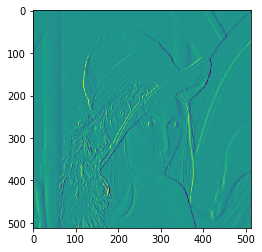

In [54]:
plt.imshow(img_sobel_x)

In [58]:
img_sobel_x

array([[  0,   0,   4, ...,  64, 168,   0],
       [  0,   0,   4, ...,  64, 168,   0],
       [  0,   0,   4, ...,  64, 168,   0],
       ...,
       [  0,  29,  19, ...,   3,  14,   0],
       [  0,  40,  25, ...,  15,   6,   0],
       [  0,  44,  28, ...,  20,  16,   0]], dtype=uint8)

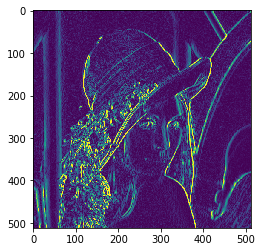

In [57]:
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)
plt.imshow(img_sobel_x)

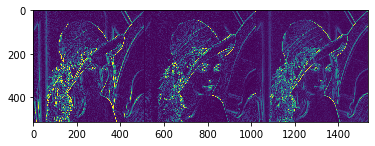

In [56]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 對 x 方向做 Sobel 邊緣檢測
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, dx=1, dy=0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

# 對 y 方向做 Sobel 邊緣檢測
img_sobel_y = cv2.Sobel(img_grey, cv2.CV_16S, dx=0, dy=1, ksize=3)
img_sobel_y = cv2.convertScaleAbs(img_sobel_y)

# x, y 方向的邊緣檢測後的圖各以一半的全重進行合成
img_sobel_combine = cv2.addWeighted(img_sobel_x, 0.5, img_sobel_y, 0.5, 0)

#　組合 + 顯示圖片
img_show = np.hstack((img_sobel_x, img_sobel_y, img_sobel_combine))
plt.imshow(img_show)

## 邊緣檢測

### 比較 Sobel 如果在 uint8 的情況下做會 overflow 的狀況

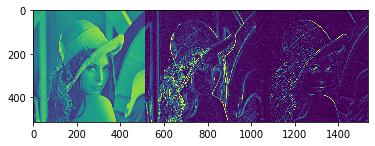

In [66]:
# 轉為灰階圖片
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 對 x 方向以包含負數的資料格式 (cv2.CV_16S) 進行 Sobel 邊緣檢測
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, dx = 1, dy = 0, ksize = 3)

# 對 x 方向依照比例縮放到所有數值都是非負整數
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

# 對 x 方向直接以非負整數的資料格式 (uint8) 進行 Sobel 邊緣檢測
img_sobel_x_uint8 = cv2.Sobel(img_grey, cv2.CV_8U, dx = 0, dy = 1, ksize = 3)

#　組合 + 顯示圖片
img_show = np.hstack((img_grey, img_sobel_x, img_sobel_x_uint8))
plt.imshow(img_show)

### 比較一次與兩次計算偏微分的結果

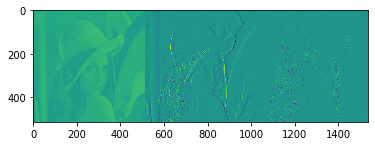

In [68]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 求一次導數取得邊緣檢測結果
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, dx = 1, dy = 0, ksize = 3)

# 求二次導數取得邊緣檢測結果
img_sobel_xx = cv2.Sobel(img_grey, cv2.CV_16S, dx = 2, dy = 0, ksize = 3)



#　組合 + 顯示圖片
img_show = np.hstack((img_grey, img_sobel_x, img_sobel_xx))
plt.imshow(img_show)